<a href="https://colab.research.google.com/github/amitaucs/tensorflowexplore/blob/master/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install tensorflow==2.0.0-alpha
import tensorflow as tf


     |████████████████████████████████| 79.9MB 135kB/s 
     |████████████████████████████████| 419kB 38.6MB/s 
     |████████████████████████████████| 3.0MB 35.1MB/s 
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstalled tensorflow-1.15.0


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or 

In [3]:
print(tf.__version__)

2.0.0-alpha0


In [0]:
from sklearn.datasets import load_breast_cancer

In [0]:
data = load_breast_cancer()

In [6]:
type(data)

sklearn.utils.Bunch

In [7]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [8]:
data.data.shape

(569, 30)

In [9]:
data.target.shape

(569,)

In [10]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [11]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_test,X_train,y_test,y_train = train_test_split(data.data,data.target,test_size = 0.33)

In [0]:
N, D = X_train.shape

In [0]:
N

In [0]:
D

In [15]:
X_train

array([[1.490e+01, 2.253e+01, 1.021e+02, ..., 2.475e-01, 2.866e-01,
        1.155e-01],
       [1.328e+01, 2.028e+01, 8.732e+01, ..., 1.492e-01, 3.739e-01,
        1.027e-01],
       [1.157e+01, 1.904e+01, 7.420e+01, ..., 6.664e-02, 3.035e-01,
        8.284e-02],
       ...,
       [1.757e+01, 1.505e+01, 1.150e+02, ..., 1.456e-01, 2.756e-01,
        7.919e-02],
       [9.787e+00, 1.994e+01, 6.211e+01, ..., 2.381e-02, 1.934e-01,
        8.988e-02],
       [2.175e+01, 2.099e+01, 1.473e+02, ..., 1.841e-01, 2.833e-01,
        8.858e-02]])

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)


In [17]:
X_train

array([[ 0.17102266,  0.69764458,  0.37708083, ...,  2.05099276,
        -0.03514213,  1.57208549],
       [-0.30353648,  0.17901809, -0.25601396, ...,  0.48967147,
         1.30368499,  0.9117227 ],
       [-0.80446002, -0.10680273, -0.81800338, ..., -0.82164782,
         0.22403517, -0.11287143],
       ...,
       [ 0.95316644, -1.02650036,  0.92964665, ...,  0.43249185,
        -0.20383742, -0.30117801],
       [-1.32676802,  0.10064787, -1.3358732 , ..., -1.50192647,
        -1.46445127,  0.2503281 ],
       [ 2.1776462 ,  0.34267356,  2.31320292, ...,  1.04399612,
        -0.08575072,  0.18326   ]])

In [20]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(1, input_shape=(D,), activation='sigmoid'))

model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train,y_train, validation_data=(X_test,y_test),epochs=100)



Train on 188 samples, validate on 381 samples
Epoch 1/100
188/188 [==============================] - 0s 1ms/sample - loss: 1.1707 - accuracy: 0.1915 - val_loss: 1.1420 - val_accuracy: 0.2572
Epoch 2/100
188/188 [==============================] - 0s 141us/sample - loss: 1.1143 - accuracy: 0.2074 - val_loss: 1.0871 - val_accuracy: 0.2730
Epoch 3/100
188/188 [==============================] - 0s 127us/sample - loss: 1.0605 - accuracy: 0.2181 - val_loss: 1.0345 - val_accuracy: 0.2913
Epoch 4/100
188/188 [==============================] - 0s 126us/sample - loss: 1.0108 - accuracy: 0.2819 - val_loss: 0.9840 - val_accuracy: 0.3176
Epoch 5/100
188/188 [==============================] - 0s 112us/sample - loss: 0.9598 - accuracy: 0.3245 - val_loss: 0.9370 - val_accuracy: 0.3360
Epoch 6/100
188/188 [==============================] - 0s 123us/sample - loss: 0.9149 - accuracy: 0.3617 - val_loss: 0.8919 - val_accuracy: 0.3570
Epoch 7/100
188/188 [==============================] - 0s 144us/sample - l

In [22]:
print("Training score", model.evaluate(X_train,y_train))
print("Test score", model.evaluate(X_test,y_test))

188/188 [==============================] - 0s 89us/sample - loss: 0.1717 - accuracy: 0.9521
Training score [0.17172038745372853, 0.95212764]
381/381 [==============================] - 0s 33us/sample - loss: 0.1757 - accuracy: 0.9528
Test score [0.17568636276903427, 0.9527559]


In [28]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

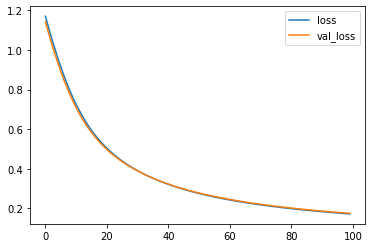

In [29]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label ='val_loss')
plt.legend()

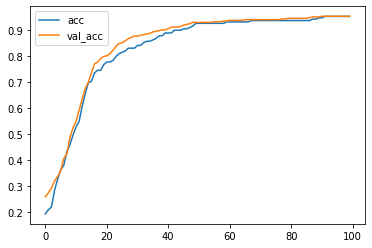

In [30]:
plt.plot(history.history['accuracy'],label='acc')
plt.plot(history.history['val_accuracy'],label ='val_acc')
plt.legend()

In [32]:
P = model.predict(X_test)
print(P)

[[9.88954425e-01]
 [9.49825525e-01]
 [9.85529840e-01]
 [9.56686854e-01]
 [9.57975626e-01]
 [9.87995386e-01]
 [8.45740557e-01]
 [9.83963430e-01]
 [8.97956848e-01]
 [3.23653221e-05]
 [9.16861594e-01]
 [4.90779191e-01]
 [9.49489355e-01]
 [9.10154819e-01]
 [2.94071704e-01]
 [8.64332318e-01]
 [9.83387291e-01]
 [3.24273407e-02]
 [9.63430583e-01]
 [7.05164135e-01]
 [6.97521508e-01]
 [9.00310516e-01]
 [9.43803906e-01]
 [9.72148895e-01]
 [9.93060827e-01]
 [8.65042806e-01]
 [4.69045937e-02]
 [2.26310611e-01]
 [8.04641068e-01]
 [9.21734571e-01]
 [9.27907228e-01]
 [9.23302352e-01]
 [2.95787454e-02]
 [3.77565622e-04]
 [4.83140022e-01]
 [8.32359493e-01]
 [9.76812601e-01]
 [9.81835425e-01]
 [2.85452604e-01]
 [8.09163094e-01]
 [9.59665537e-01]
 [9.45022404e-01]
 [9.14161265e-01]
 [9.59403872e-01]
 [4.78093565e-01]
 [8.66110086e-01]
 [9.63525414e-01]
 [8.39112043e-01]
 [8.98808539e-02]
 [2.61727631e-01]
 [5.64455986e-05]
 [9.75957394e-01]
 [4.09453511e-02]
 [9.21186209e-01]
 [9.49934840e-01]
 [4.056576